# Data Pre Processing

In [1]:
%load_ext autoreload
%autoreload 2
from utils import code

In [2]:
#support
from adjust_datatype import urlify, int_to_float, pct_to_numeric
from adjust_datatype import string_to_numeric, string_to_datetime, currency_to_numeric
from plot_libraries import setup_graphics, dist_plot
from datasets import get_data

In [3]:
# load libraries and set plot parameters
import os, random, re, sys, time, warnings
import math
import numpy as np
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline
sns.set()
pd.options.display.max_columns = None
setup_graphics()

Features:

* `Account_ID`: Identifier                                
* `Number_Of_Opportunities`: (numeric)                  
* `Nb_Won_Opp`: (numeric)                               
* `Number_of_Open_Opportunities`: (numeric)             
* `LastModifiedOpportunitiesDate`: (datetime)             
* `Last_Activity`: (datetime)                              
* `Last_Lead_Activity`: (datetime)                         
* `Activities_Last_30_Days`: (numeric)                   
* `Employees`: (numeric)                                 
* `ZoomInfo_Employee_Range`: (cat: 1-5; 5-50; ....)                   
* `ZoomInfo_Revenue_Range`:  (cat: 0-1000; 1000-5000; ....)                      
* `Annual_Revenue`: (numeric)                             
* `Organic_Visits`: (numeric)                             
* `Pct_Organic_Visits`:  (pct)                       
* `SEO_team_in_the_enterprise_organization`: (cat: 'Under Mkt' or 'Under websit PM')   
* `SEO_Visits`:  (numeric)                               
* `Combined_Pages`:  (numeric)                           
* `URLs_Indexed`: (numeric)                              
* `ZoomInfo_Global_HQ_Country`: (cat: Counties list)                
* `Account_Status`:  (cat: 'Active Customer', 'Lost Customer', 'Prospect')                           
* `Active_Service_Package`: (cat: 'Service Package Custom', 'No Service Package')                    
* `Annual_Revenue_converted`:  (currency)                 
* `Billing_Country_text_only`: (cat: Counties list)                 
* `Commited_MRR_Today_converted`:  (currency)             
* `Industry`:  (cat: 'retail', 'media'. 'software'...)                                 
* `Adjusted_Industry`: (cat: colapsed list of industries)                         
* `NbUsers`: (numeric)                                   
* `NbProjects`: (numeric)                                
* `NbSessions`: (numeric)                                
* `Net_Promoter_Score`: (numeric)                        
* `Account_ICP_Score`: (numeric)                         
* `Account_ICP_Tier`: (cat: 'Tier S', 'Tier A', 'Tier B', 'Tier C' )                          
* `ICP_TIER_HS`: (cat: same as above)                               
* `Page_Count`: (numeric)                                
* `Page_Count_Range`:  (cat: 0-1000; 1000-5000; ....)                          
* `Alexa_Rank`: (numeric)                                 
* `Became_a_Customer_date`: (datetime)                    
* `Parent_Account_Status`: (cat: 'Active Customer', 'Lost Customer', 'Prospect')   

### Upload Dataset

In [4]:
dataset = pd.read_csv('../data/dataset_csv.csv', delimiter=';', low_memory=False)
dataset.shape

(17553, 38)

In [5]:
dataset.head()

,Account ID,Number Of Opportunities,Nb Won Opp,Number of Open Opportunities,LastModifiedOpportunitiesDate,Last Activity,Last Lead Activity,Activities Last 30 Days,Employees,ZoomInfo Employee Range,ZoomInfo Revenue Range,Annual Revenue,Organic Visits,Pct Organic Visits,SEO team in the enterprise organization?,SEO Visits,Combined Pages,URLs Indexed,ZoomInfo Global HQ Country,Account Status,Active Service Package,Annual Revenue (converted),Billing Country (text only),Commited MRR - Today (converted),Industry,Adjusted Industry,NbUsers,NbProjects,NbSessions,Net Promoter Score,Account ICP Score,Account ICP Tier,ICP TIER - HS,Page Count,Page Count - Range,Alexa Rank,Became a Customer date,Parent Account Status
0,0012400000L5cmZ,7,1,1,2/14/2020 3:00 PM,11/12/2019,10/2/2019,0,10,-,-,"EUR 3,000,000.0","61,688,430",34.00%,-,"61,688,430",0,"27,700,000",-,Lost Customer,No Service Package,"USD 3,333,900.00",Turkey,USD 0.00,Internet Software & Services,Retail,2,9,9,-,91.667,Tier A,Tier A,"27,700,000",>1M,331,2/12/2020,-
1,0011p00001Sgf9s,0,0,0,-,-,-,0,"2,940","1,000 - 5,000",-,"GBP 1,000,000,000.00",-,-,-,0,"2,670,000",-,United States,Prospect,No Service Package,"USD 1,311,577,953.50",United States,USD 0.00,PUBLISHING,Publisher,-,-,-,-,41.667,Tier A,Tier C - Incomplete,-,-,511,-,-
2,00124000004sEH5,11,8,1,2/14/2020 1:02 PM,2/14/2020,-,51,"10,000",-,-,"EUR 12,000,000,000.0","19,397,082",93.00%,-,"28,615,923","206,300","76,200",-,Active Customer,Service Package Custom,"USD 13,335,600,000.00",France,"USD 1,000.17",Retailing,Retail,7,7,4,8,100,Tier A,Tier A,"206,300",Between 100K and 250K,"8,881",2/3/2020,Prospect
3,00124000015MJ24,0,0,0,-,-,-,0,"10,000",-,-,"EUR 1,000,000,000.0","31,310,211",66.00%,-,"31,310,211","1,570,000","1,570,000",-,Prospect,No Service Package,"USD 1,111,300,000.00",India,USD 0.00,Media,Media,-,-,-,-,100,Tier A,Tier A,"1,570,000",>1M,904,-,Prospect
4,0011p00002dLLfO,0,0,0,-,1/13/2020,-,0,"10,000","Over 10,000",Over $5 bil.,"USD 1,000,000,000.00",-,-,-,0,0,-,United States,Partner,No Service Package,"USD 1,000,000,000.00",United States,USD 0.00,Computer Software,-,-,-,-,-,20.833,Tier A,Tier D - Incomplete,-,-,"1,000,001",-,Prospect


We have to fix some issue before we ahead such as: 
##### Fix column names with whitespaces to underscores

In [6]:
dataset.rename(urlify, axis='columns', inplace=True)

##### Fix datatypes to numeric

In [7]:
dataset = int_to_float(dataset)

In [8]:
dataset['Pct_Organic_Visits']  = pct_to_numeric(dataset, 'Pct_Organic_Visits')

In [9]:
numeric_cols =['Activities_Last_30_Days', 'Employees', 
               'Organic_Visits', 'SEO_Visits', 'Combined_Pages',
               'URLs_Indexed', 'NbProjects', 
               'NbUsers', 'NbSessions', 'Net_Promoter_Score', 
               'Account_ICP_Score', 'Page_Count', 'Alexa_Rank']

In [10]:
for col in numeric_cols:
    dataset[col] = string_to_numeric(dataset, col)

In [11]:
datetime_cols = ['LastModifiedOpportunitiesDate', 'Last_Activity',
                  'Last_Lead_Activity', 'Became_a_Customer_date' ]

In [12]:
for col in datetime_cols:
    dataset[col] = string_to_datetime(dataset, col)

In [13]:
currency_cols = ['Commited_MRR_Today_converted', 'Annual_Revenue_converted']
for col in currency_cols:
    dataset[col] = currency_to_numeric(dataset, col)

### Target Columns

Our task is to predict if the lead will convert at next attemp

In [14]:
dataset = dataset[dataset['Account_Status'] != 'Partner'].copy()

In [15]:
def target(status, n_try):
    if status == 'Active Customer': return 'yes'     
    elif status == 'Lost Customer': return 'no'       
    elif (status == 'Prospect') & (n_try >0): return 'no'  
    else: return 'prospect'

In [16]:
dataset['y'] = dataset.apply(lambda x: target(x['Account_Status'],x['Number_Of_Opportunities']),axis=1)

At this time some columns does not have any predictive value (n uniques <=1), specially because they are generated after the deal.

In [17]:
uniques = dataset[dataset.y == 'prospect'].nunique()
uniques[uniques<=1]

Number_Of_Opportunities          1
Nb_Won_Opp                       1
Number_of_Open_Opportunities     1
LastModifiedOpportunitiesDate    0
Account_Status                   1
Active_Service_Package           1
Commited_MRR_Today_converted     1
Became_a_Customer_date           0
y                                1
dtype: int64

 We have to drop them (except our target variable)

In [18]:
drop_uniques = uniques[uniques<=1].index[:-1]
dataset.drop(columns=drop_uniques, inplace=True)

### Fix Critic Errors

##### We must drop some columns with critical problems such as:
* `SEO_team_in_the_enterprise_organization:` Only 7 rows filled 
* `Annual_Revenue:` Similar to 'Annual_Revenue_converted'
* `ICP_TIER_HS:` Similar to 'Account_ICP_Tier'

* `'Net_Promoter_Score', 'NbSessions', 'NbProjects', 'NbUsers','Last_Lead_Activity', 'Combined_Pages', 'Last_Activity','Pct_Organic_Visits', 'Page_Count', 'URLs_Indexed':` Too many missing values

In [19]:
dataset.SEO_team_in_the_enterprise_organization.value_counts()

-                                 17540
Under marketing                       4
Under the website product team        3
Name: SEO_team_in_the_enterprise_organization, dtype: int64

In [20]:
drop_null = dataset.isnull().mean().sort_values(ascending=False)[:10]
drop_null

Net_Promoter_Score    0.993788
NbSessions            0.983986
NbProjects            0.931384
NbUsers               0.931384
Last_Lead_Activity    0.821166
Combined_Pages        0.697213
Last_Activity         0.577421
Pct_Organic_Visits    0.364279
Page_Count            0.212230
URLs_Indexed          0.212230
dtype: float64

In [21]:
drop = ['Annual_Revenue', 'ICP_TIER_HS', 'SEO_team_in_the_enterprise_organization'] + drop_null.index[:7].to_list()
dataset.drop(columns=drop, inplace=True)

Some categorical features has too much unique values

* `Industry:` Similar to 'Adjusted_Industry'
* `Billing_Country_text_only:` Similar to 'ZoomInfo_Global_HQ_Country'

In [22]:
categorical = dataset.select_dtypes(include=['object']).columns
nuniques = dataset[categorical].nunique().sort_values(ascending=False)
nuniques

Account_ID                    17547
Industry                        200
Billing_Country_text_only       141
ZoomInfo_Global_HQ_Country      128
Page_Count_Range                 13
ZoomInfo_Revenue_Range           13
ZoomInfo_Employee_Range          12
Adjusted_Industry                10
Account_ICP_Tier                  5
Parent_Account_Status             4
y                                 3
dtype: int64

Fixing `Adjusted_Industry` values:

In [23]:
dataset['Adjusted_Industry'].value_counts()

Media                         5583
Retail                        3879
Other                         3547
Classified                    2383
Travel                         739
-                              545
Agencies                       501
Botify Ltd.                    287
Publisher                       50
Financial Services/Banking      33
Name: Adjusted_Industry, dtype: int64

In [24]:
for val in ['Publisher', '-', 'Other', 'Botify Ltd.']:
    dataset['Adjusted_Industry'].mask(dataset['Adjusted_Industry'] == val, 'Other', inplace=True)

Transform `ZoomInfo_Global_HQ_Country` values into a binary class US or non-US, could be useful:

In [25]:
dataset['ZoomInfo_Global_HQ_Country'].value_counts()

United States     7162
-                 4880
United Kingdom     533
Canada             468
Germany            387
                  ... 
Jersey               1
Liberia              1
Moldova              1
Guam                 1
Liechtenstein        1
Name: ZoomInfo_Global_HQ_Country, Length: 128, dtype: int64

In [26]:
def HQ(country):
    if country == 'United States': return 'US'     
    elif country == '-': return '-'        
    else: return 'non_US'

In [27]:
dataset['ZoomInfo_Global_HQ_Country'] = dataset.apply(lambda x: HQ(x['ZoomInfo_Global_HQ_Country']),axis=1)

In [28]:
drop = ['Industry', 'Billing_Country_text_only']
dataset.drop(columns=drop, inplace=True)

##### Some rows are highly empty, most of them are tagged as 'Incomplete' (+-20%), in the `Account_ICP_Tier` column. Let's remove them.

In [29]:
dataset = dataset[dataset['Account_ICP_Tier'] != 'Incomplete'].copy()

### Split Dataset

In [30]:
trainDF = dataset[dataset['y'].isin(['yes' , 'no'])].copy()

In [31]:
PredDF = dataset[dataset['y'] == 'prospect'].copy()

In [32]:
trainDF.to_csv(r'/Users/nicholasrichers/Documents/GitHub/b2b_sales_project/data/trainDF.csv',
               index=False, header=True)

In [33]:
PredDF.to_csv(r'/Users/nicholasrichers/Documents/GitHub/b2b_sales_project/data/PredDF.csv',
              index=False, header=True)

In [34]:
trainDF.shape

(1849, 19)

### Final Version

In [35]:
dataset.profile_report()

# Exploratory Data Analisys

describe and categorize columns

In [36]:
X, y = get_data('../data/trainDF.csv')
X.head()

,Activities_Last_30_Days,Employees,ZoomInfo_Employee_Range,ZoomInfo_Revenue_Range,Organic_Visits,Pct_Organic_Visits,SEO_Visits,URLs_Indexed,ZoomInfo_Global_HQ_Country,Annual_Revenue_converted,Adjusted_Industry,Account_ICP_Score,Account_ICP_Tier,Page_Count,Page_Count_Range,Alexa_Rank,Parent_Account_Status
Account_ID,,,,,,,,,,,,,,,,,
0012400000L5cmZ,0.0,10.0,-,-,61688430.0,0.34,61688430.0,27700000.0,-,3.333900e+06,Retail,91.667,Tier A,27700000.0,>1M,331.0,-
00124000004sEH5,51.0,10000.0,-,-,19397082.0,0.93,28615923.0,76200.0,-,1.333560e+10,Retail,100.000,Tier A,206300.0,Between 100K and 250K,8881.0,Prospect
00124000004sUGG,0.0,5000.0,-,-,49283858.0,0.53,50132407.0,12600000.0,-,5.556500e+08,Media,100.000,Tier A,12709000.0,>1M,1118.0,Lost Customer
0011p00002SeaiQ,0.0,383.0,250 - 500,$50 mil. - $100 mil.,177515.0,NaN,177515.0,1090000.0,US,7.360000e+07,Classified,70.833,Tier A,1090000.0,>1M,126905.0,-
0011p00001SghSL,0.0,5000.0,"1,000 - 5,000",$500 mil. - $1 bil.,8052961.0,0.59,10416602.0,2340000.0,US,2.500000e+08,Classified,100.000,Tier A,3640000.0,>1M,4742.0,Prospect


Calculate current and previous campaign success rates. Note that the classes are unbalanced.

In [37]:
print('Number of records:', len(X))
print('Success Rate (Last Campaign):', y.sum() / len(X))

Number of records: 1849
Success Rate (Last Campaign): 0.17036235803136832


In [38]:
dtypes = pd.DataFrame(X.dtypes.rename('type')).reset_index().astype('str')
numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric)) & (dtypes['index'] != 'y')]['index'].values

print('Numeric:\n', numeric)
print('Categorical:\n', categorical)

Numeric:
 ['Activities_Last_30_Days' 'Employees' 'Organic_Visits'
 'Pct_Organic_Visits' 'SEO_Visits' 'URLs_Indexed'
 'Annual_Revenue_converted' 'Account_ICP_Score' 'Page_Count' 'Alexa_Rank']
Categorical:
 ['ZoomInfo_Employee_Range' 'ZoomInfo_Revenue_Range'
 'ZoomInfo_Global_HQ_Country' 'Adjusted_Industry' 'Account_ICP_Tier'
 'Page_Count_Range' 'Parent_Account_Status']


### Categorical Values

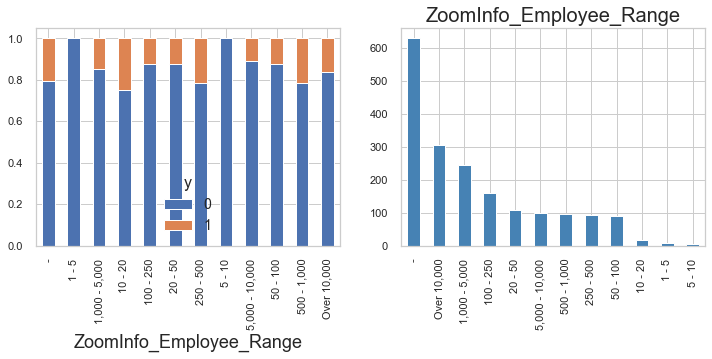

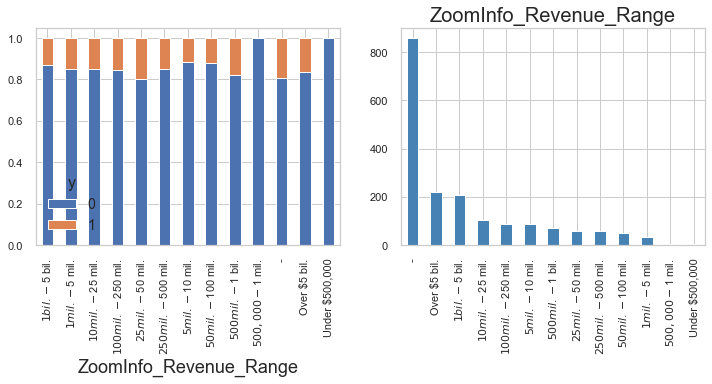

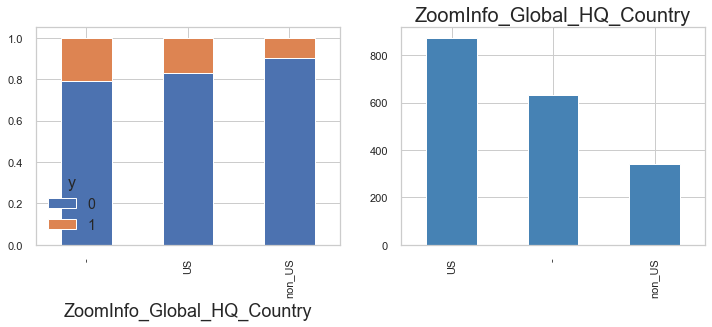

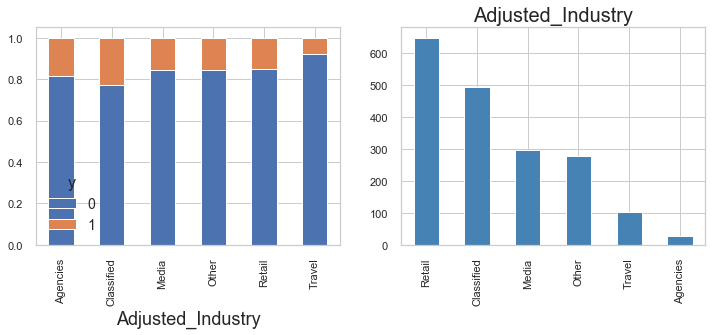

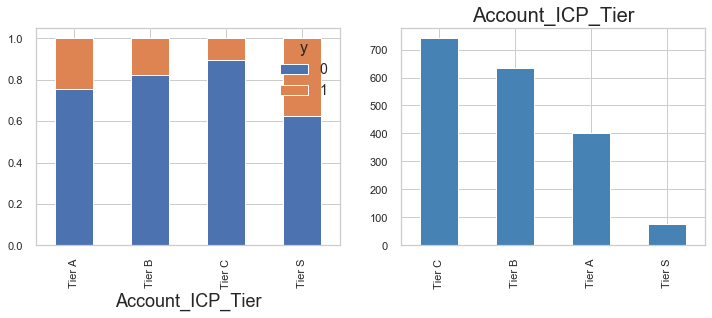

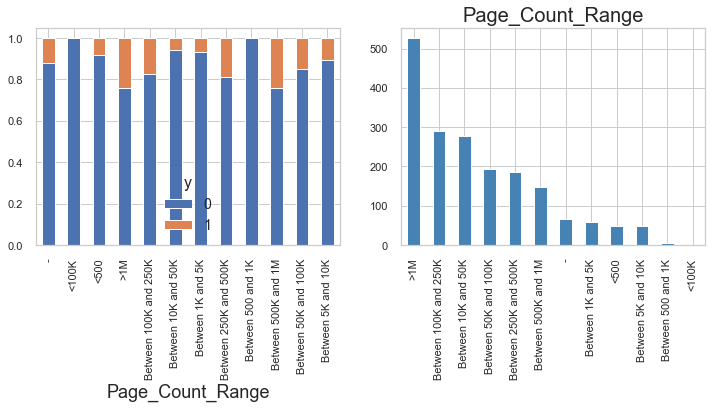

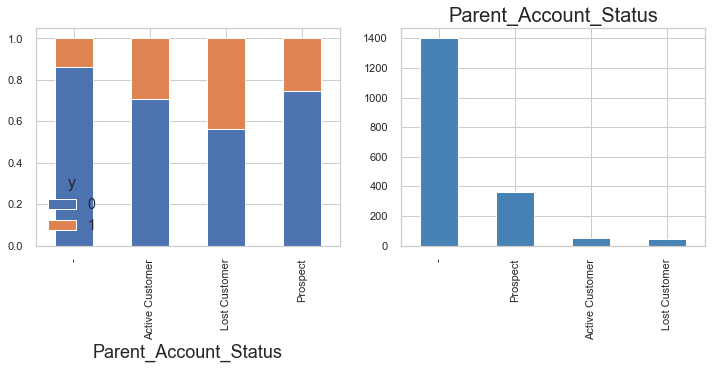

In [39]:
for attr in categorical:
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
  outcome_counts = X.groupby([attr, y]).size().rename('count').reset_index()
  by_outcome = outcome_counts.pivot(columns='y', values='count', index=attr)
  # Plot the proportions
  by_outcome.div(by_outcome.sum(1), axis=0).plot.bar(stacked=True, ax=ax1)
  # Plot the counts
  X[attr].value_counts().plot.bar(ax=ax2, legend=False,color='steelblue')
  #print('Support (%s)\n' % attr)
  #print(X[attr].value_counts(), '\n')
  plt.title(attr)

* `ZoomInfo_Employee_Range`: Can't say much because there are too many empty values ("-"), and classes with higher proportions has few values.
* `ZoomInfo_Revenue_Range:` Same as above, maybe use the equivalent numeric values could be a good strategy.
* `ZoomInfo_Global_HQ_Country:` Transform this column to "US or non-US", now seem to be a good idea, US companies are more likely to convert.
* `Account_ICP_Tier:` As we increase the class more likely
* `Page_Count_Range:` As we increase page count more likely
* `Parent_Account_Status:` There are too few values about the classes, to able us to infer any information about them.



### Numeric Values

As we still have some missing values, we will have to create later some rules to fill them in order to perform some models such as linear, which are not robust to nan values.

In [40]:
X[numeric].isnull().sum()

Activities_Last_30_Days       0
Employees                    27
Organic_Visits              107
Pct_Organic_Visits          395
SEO_Visits                    0
URLs_Indexed                106
Annual_Revenue_converted     35
Account_ICP_Score             0
Page_Count                  106
Alexa_Rank                    0
dtype: int64

Most of numeric columns are also highly skewed, a **log-tansform**, can be useful here.

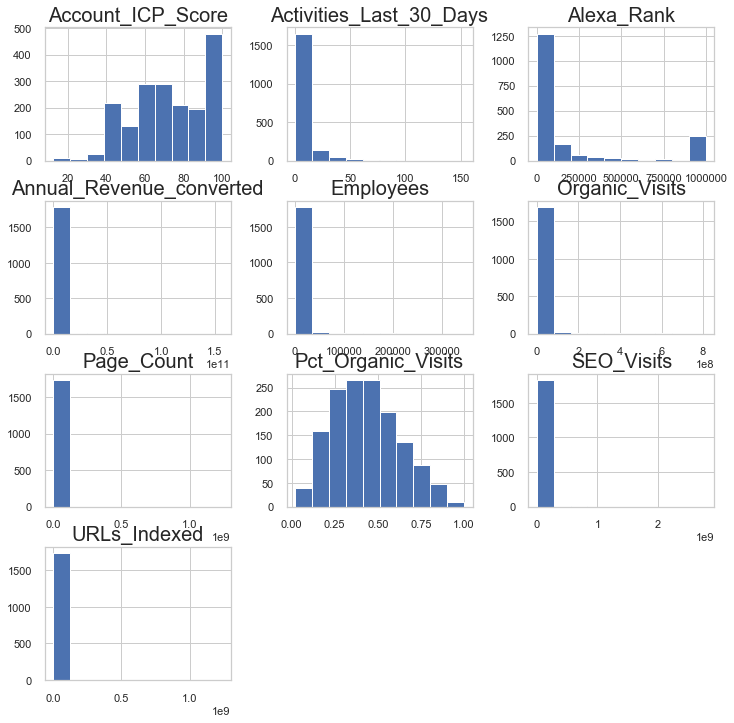

In [41]:
X[numeric].hist(figsize=(12,12));

In [42]:
X[numeric].describe()

,Activities_Last_30_Days,Employees,Organic_Visits,Pct_Organic_Visits,SEO_Visits,URLs_Indexed,Annual_Revenue_converted,Account_ICP_Score,Page_Count,Alexa_Rank
count,1849.000000,1822.000000,1.742000e+03,1454.000000,1.849000e+03,1.743000e+03,1.814000e+03,1849.000000,1.743000e+03,1.849000e+03
mean,5.316928,6453.345225,1.198246e+07,0.432539,1.698991e+07,3.958296e+06,1.276112e+09,72.611315,5.625665e+06,1.970221e+05
std,11.515994,18764.080327,5.047764e+07,0.193007,9.085057e+07,4.251408e+07,5.914520e+09,19.244586,4.912770e+07,3.394494e+05
min,0.000000,0.000000,2.090000e+02,0.020000,0.000000e+00,0.000000e+00,0.000000e+00,12.500000,0.000000e+00,1.400000e+01
25%,0.000000,200.000000,4.517790e+05,0.280000,5.534180e+05,2.780000e+04,3.000000e+07,58.333000,5.596500e+04,5.864000e+03
50%,0.000000,2000.000000,1.579582e+06,0.420000,2.028033e+06,1.570000e+05,2.500000e+08,70.833000,2.380000e+05,2.833200e+04
75%,6.000000,10000.000000,5.451365e+06,0.560000,7.532112e+06,1.004500e+06,1.000000e+09,91.667000,1.370000e+06,1.489020e+05
max,153.000000,345000.000000,8.132553e+08,1.000000,2.785939e+09,1.240000e+09,1.567760e+11,100.000000,1.240000e+09,1.000001e+06


### Correlated Columns

We'll need to determine which variables are most predictive as features and drop the less predictive features to eliminate multicollinearity.


* `Annual_Revenue_converted` & `Employees`  
* `Organic_Visits` & `SEO_Visits`    
* `URLs_Indexed` & `Page_Count`   


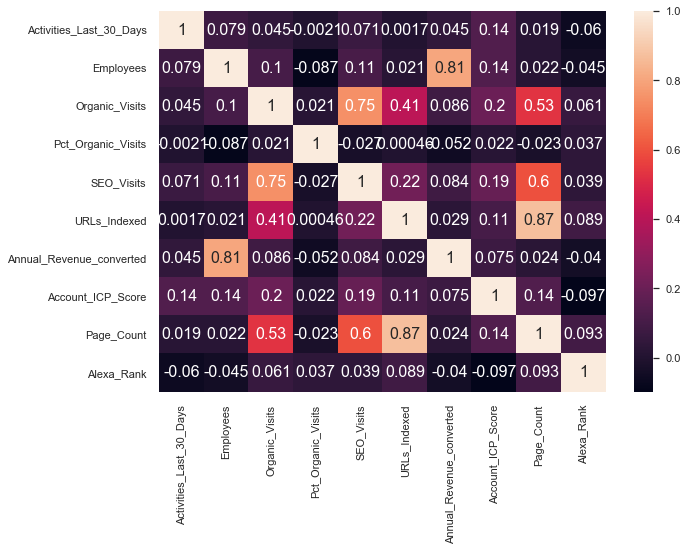

In [43]:
plt.figure(figsize=(10,7))
sns.heatmap(X[numeric].corr('pearson'), annot=True)

### Distribution by Outcome


* `Activities_Last_30_Days`: Customers with no activity tend to not convert.
* `Organic_Visits`: Customers with more organic visits are more likely to convert, but for our surprise, the feature `Pct_Organic_Visits` cannot say anything in terms of the outcome.
* `URLs_Indexed`: More likely to convert as the feature increase.
* `Account_ICP_Score`:  More likely to convert as the feature increase.

Obs: We performed a **log transform** to some features in order to improve our analysis.

In [44]:
numeric_outcome = pd.concat([X[numeric],y], axis=1)

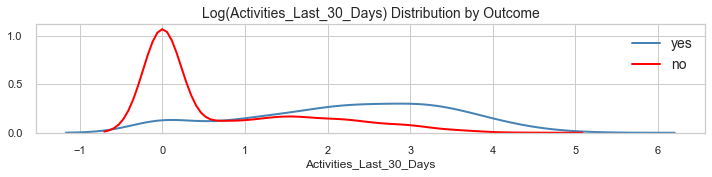

In [45]:
dist_plot(numeric_outcome, 'Activities_Last_30_Days', log=True)

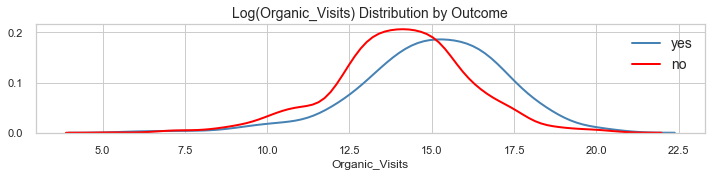

In [46]:
dist_plot(numeric_outcome, 'Organic_Visits', log=True)

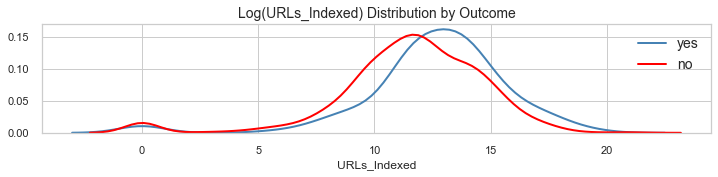

In [47]:
dist_plot(numeric_outcome, 'URLs_Indexed', log=True)

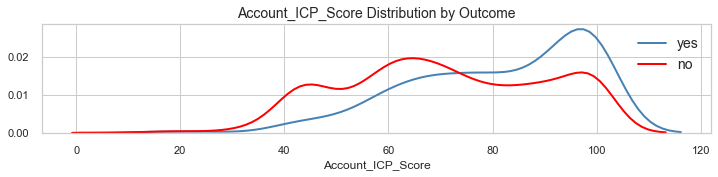

In [48]:
dist_plot(numeric_outcome, 'Account_ICP_Score', log=False)

### Exploratory Questions


**Estimate the conversion rate at 95% confidence**

Take a random sample 10% of the training set to estimate the true conversion rate at 95% confidence.

In [59]:
x_y = y.sample(frac=.1, random_state=42)
x_y_n_instances = len(x_y)
x_y_yes_n = len(x_y[x_y == 1])
x_p = x_y_yes_n / len(x_y)

print('Number of instances: {:,}'.format(len(x_y)))
print('Number of conversions {:,}'.format(x_y_yes_n))
print('Conversion rate: {:.2f}%'.format(x_p * 100.))

Number of instances: 185
Number of conversions 38
Conversion rate: 20.54%


In [60]:
se = np.sqrt(x_p * (1-x_p) / len(x_y))

print('Standard error: {:.2f}'.format(se))
print('95% confidence interval for p_hat: ({:.2f}, {:.2f})'.format(x_p - se*1.96, x_p + se*1.96))

Standard error: 0.03
95% confidence interval for p_hat: (0.15, 0.26)


**How many customers belongs to Tiers S or A and how many of them converted?**

$$P(y=1 \mid Tier=SA) = \frac{P(y=1, Tier=SA)}{P(Tier=SA)}$$

In [69]:
X_SA = X[X.Account_ICP_Tier.isin(['Tier S', 'Tier A'])]
X_SA_success = X_SA[y == 1]
p_SA = len(X_SA) / len(X)
p_SA_success = len(X_SA_success) / len(X_SA)

print('Number of customers in Tiers S or A: {:,}'.format(len(X_SA)))
print('Percent of customers in Tiers S or A: {:.2f}%'.format(p_SA*100.))
print('Tiers S or A ans converted: {:,}'.format(len(X_SA_success)))
print('Tiers S or A, conversion rate: {:.2f}%'.format(p_SA_success*100.))

Number of customers in Tiers S or A: 475
Percent of customers in Tiers S or A: 25.69%
Tiers S or A, corverted: 126
Tiers S or A, conversion rate: 26.53%


**25% of the customers belongs to Tiers S or A, and 26.5% converted which is slightly upper than the confidence interval. SO we can say with confidence that customers in Tiers S or A are more likely to convert, hence we will use this simple rule as our baseline classifier**